<center> 

# Trabajo Machine Learning
## Clasificación binaria
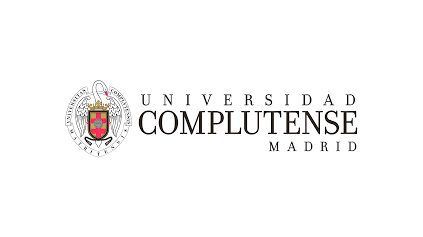


**Alumno**: Trosman, Denis

**Fecha de entrega**: 01/06/2023

**Profesores**: Daniel Gómez, Inmaculada Gutiérrez



## Consigna

1) Determinar la mejor regresión logística y el mejor árbol de regresión (1 punto)
2) Determinar el mejor modelo de Bagging y de Random Forest (1 punto)
3) Determinar el mejor modelo de Gradient Boosting y de XGBoost (1 punto)
4) Realizar y detallar el preprocesado de los datos previo a la determinación de la Red Neuronal. (1 punto)
5) Probar los distintos métodos de selección de variables, compararlos y determinar las variables de entrada a la red. (1 punto)
6) Con el mejor o (mejores modelos), estudiar los mejores parámetros (nodos, decay) en Redes Neuronales (tuneando con caret o similar). (1 punto)
7) Realizar una búsqueda paramétrica para determinar el mejor modelo de SVM con al menos dos kernels diferentes. (1 punto)
8) Realizar un método de ensamblado de Bagging con un mismo clasificador base que no sea un árbol. (1 punto)
9) Realizar un método de Stacking escogiendo varios algoritmos de entrada y el modelo que se prefiera como modelo de ensamblaje. (1 punto)
10) Comparar todos los modelos anteriores y determinar el mejor de todos ellos (1 punto)

## Importar librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#Modelos
import sklearn as sk

## Lectura de base de datos

#### Resumen de la base de datos:

Los canales de reserva de hoteles en línea han cambiado drásticamente las posibilidades de reserva y el comportamiento de los clientes. Un número significativo de reservas de hotel se cancelan debido a cancelaciones o no presentación. Las razones típicas de las cancelaciones incluyen cambios de planes, conflictos de programación, etc. Esto a menudo se facilita con la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es una forma menos deseable y posiblemente rentable. -factor decreciente con el que deben lidiar los hoteles.

Este dataset entregado por **Kaggle** nos da una oportunidad de encontrar tendencias y probar modelos de clasificación para entender los motivos detras de los cancelamientos de reservas hoteleras.


-    Booking_ID: unique identifier of each booking
-    no_of_adults: Number of adults
-    no_of_children: Number of Children
-    no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
-    no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
-    type_of_meal_plan: Type of meal plan booked by the customer:
-    required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
-    room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
-    lead_time: Number of days between the date of booking and the arrival date
-    arrival_year: Year of arrival date
-    arrival_month: Month of arrival date
-    arrival_date: Date of the month
-    market_segment_type: Market segment designation.
-    repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
-    no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
-    no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
-    avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
-    no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
-    booking_status: Flag indicating if the booking was canceled or not.


https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/code?datasetId=2783627&sortBy=voteCount

In [2]:
df = pd.read_csv('C:/Users/denis/OneDrive/Escritorio/Master/Modulo 10 - Machine Learning/Tarea/Hotel Reservations.csv')

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')
print(f'\nCantidad de duplicados: {df.duplicated().sum()}\n')
print('-'*30 + 'Tipos de columnas'+ '-'*30)
print(df.dtypes)
print('-'*30 + 'Cantidad de nulos' +'-'*30)
df.isna().sum()

Número de filas: 36275, Número de columnas:19

Cantidad de duplicados: 0

------------------------------Tipos de columnas------------------------------
Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests          

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
#Sacamos el ID
df = df.drop(columns=['Booking_ID'])

In [5]:
df.describe(include=['O'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2017.82,7.42,15.60,0.03,0.02,0.15,103.42,0.62
std,0.52,0.40,0.87,1.41,0.17,85.93,0.38,3.07,8.74,0.16,0.37,1.75,35.09,0.79
min,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018.00,5.00,8.00,0.00,0.00,0.00,80.30,0.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018.00,8.00,16.00,0.00,0.00,0.00,99.45,0.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018.00,10.00,23.00,0.00,0.00,0.00,120.00,1.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018.00,12.00,31.00,1.00,13.00,58.00,540.00,5.00


## EDA

### Transformaciones

**Target (booking_status)**

Convertir a binaria y visualizar distribucion

In [7]:
df['status'] = [0 if x == 'Not_Canceled' else 1 for x in df.booking_status]

Dos tercios de las reservas no fueron canceladas, mientras 1 tercio si lo fue. No contamos con un desbalance que dificulte el análisis.

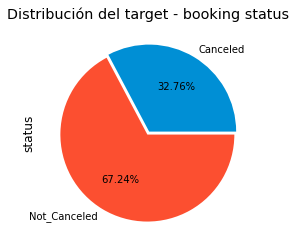

In [8]:
ax = df.groupby(['booking_status']).count().plot(kind='pie', y='status', autopct='%.02f%%', explode=(0.02,0.02))
ax.get_legend().remove()
plt.title('Distribución del target - booking status')
plt.show()

**Date**

Convertimos a fecha, eliminamos los NAs (29 de febrero) y creamos features importantes

In [9]:
df['date'] = df.arrival_year.astype(str)+ '/' +df.arrival_month.astype(str)+ '/'+df.arrival_date.astype(str)
df['date'] = pd.to_datetime(df.date, errors='coerce')
df = df.dropna(subset=['date'])

In [10]:
def create_date_features(df):
    df['month'] = df.date.dt.month.astype("int8")
    df['day_of_month'] = df.date.dt.day.astype("int8")
    df['day_of_year'] = df.date.dt.dayofyear.astype("int16")
    df['week_of_month'] = (df.date.apply(lambda d: (d.day-1) // 7 + 1)).astype("int8")
    df['week_of_year'] = (df.date.dt.weekofyear).astype("int8")
    df['day_of_week'] = (df.date.dt.dayofweek + 1).astype("int8")
    df['year'] = df.date.dt.year.astype("int32")
    df["is_wknd"] = (df.date.dt.weekday // 4).astype("int8")
    df["quarter"] = df.date.dt.quarter.astype("int8")
    df['is_month_start'] = df.date.dt.is_month_start.astype("int8")
    df['is_month_end'] = df.date.dt.is_month_end.astype("int8")
    df['is_quarter_start'] = df.date.dt.is_quarter_start.astype("int8")
    df['is_quarter_end'] = df.date.dt.is_quarter_end.astype("int8")
    df['is_year_start'] = df.date.dt.is_year_start.astype("int8")
    df['is_year_end'] = df.date.dt.is_year_end.astype("int8")
    return df

df = create_date_features(df)

Visualizamos distribuciones de variables categoricas

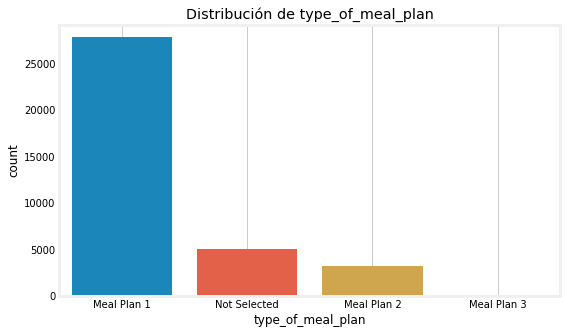

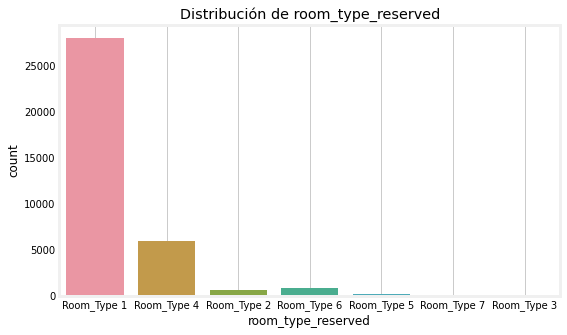

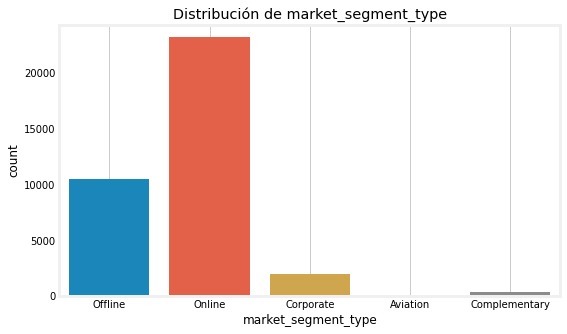

In [11]:
cat_cols = list(df.select_dtypes(include='O').iloc[:,:3].columns)

for col in cat_cols:
    plt.figure(figsize=(8,5))
    ax = plt.axes()
    sns.countplot(data=df,x=col)
    plt.grid(b=None)
    ax.set_facecolor('white')
    plt.title(f'Distribución de {col}')
    plt.show()

Notamos que hay algunas categorías con pocos valores, por lo que podrían agruparse

In [12]:
df['room_type_reserved']=[x if x in ['Room_Type 1','Room_Type 4'] else 'other' for x in df.room_type_reserved]

In [13]:
df['type_of_meal_plan']=[x if x in ['Meal Plan 1','Not Selected'] else 'other' for x in df.type_of_meal_plan]

In [14]:
df['market_segment_type']=[x if x in ['Offline','Online'] else 'other' for x in df.market_segment_type]

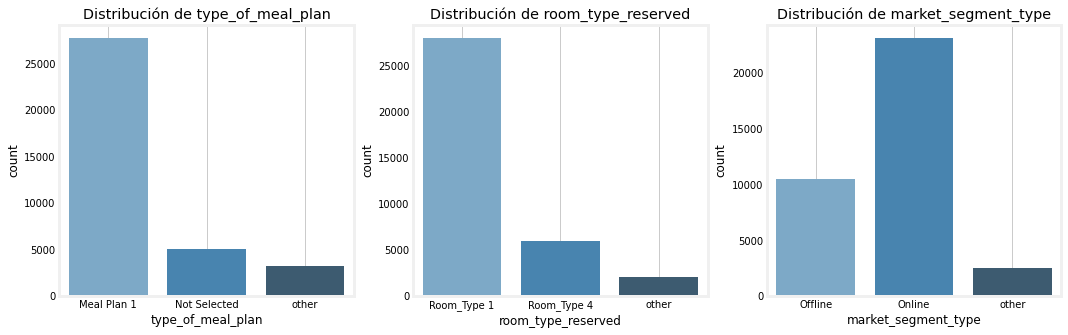

In [15]:
cat_cols = list(df.select_dtypes(include='O').iloc[:,:3].columns)

fig, axes = plt.subplots(ncols=len(cat_cols), figsize=(16,5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette = 'Blues_d')
    axes[i].grid(b=None)
    axes[i].set_facecolor('white')
    axes[i].set_title(f'Distribución de {col}')

plt.show()

### Limpieza

Eliminamos las columnas que quedaron obsoletas.

In [16]:
df = df.drop(columns=['arrival_year', 'arrival_month','arrival_date'])

Eliminamos aquellos con precio 0 (alrededor de 500 registros), ya que no tiene sentido en el analisis.

In [17]:
df = df[df.avg_price_per_room != 0]

### Relaciones entre variables

In [18]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests']

date_cols = list(df.iloc[:,-15:].columns)

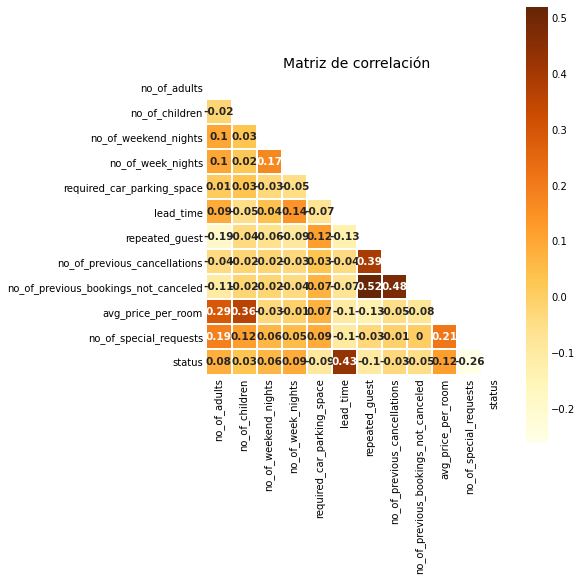

In [19]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(6,8))
    ax.set_facecolor('white')
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)

    plt.show()
    

var_corr = round(df[num_cols + ['status']].corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Matriz de correlación'
                       ,mask_uppertri = True)

Notamos que las cancelaciones suelen ser con anticipacion, y el precio no parece un factor importante

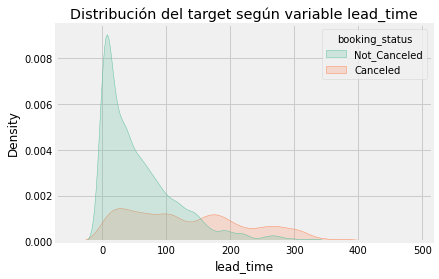

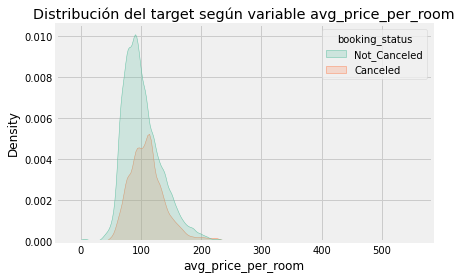

In [20]:
cont_vars = ['lead_time', 'avg_price_per_room']

for col in cont_vars:
    sns.kdeplot(x=col, hue='booking_status', palette = 'Set2', shade=True, data=df)
    plt.title(f'Distribución del target según variable {col}')
    plt.show()

### Outliers

Creamos la funcion para quitar outliers segun los quantiles.

Aplicamos solo la funcion a las columnas lead_time y numero de dias de fin de semana, ya que en las otras tiene sentido la presencia de valores alejados.

In [21]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))] 

In [22]:
for columna in num_cols:
    outliers = round((1 - len(tukey_outliers(df,columna,extreme=False))/len(df))*100,2)
    print('Outliers en columna',columna,':',outliers,'%')

Outliers en columna no_of_adults : 27.57 %
Outliers en columna no_of_children : 7.45 %
Outliers en columna no_of_weekend_nights : 0.06 %
Outliers en columna no_of_week_nights : 0.9 %
Outliers en columna required_car_parking_space : 3.07 %
Outliers en columna lead_time : 3.32 %
Outliers en columna repeated_guest : 2.24 %
Outliers en columna no_of_previous_cancellations : 0.84 %
Outliers en columna no_of_previous_bookings_not_canceled : 1.92 %
Outliers en columna avg_price_per_room : 3.08 %
Outliers en columna no_of_special_requests : 2.04 %


In [23]:
for columna in ['lead_time','no_of_weekend_nights']:
    df = tukey_outliers(df,columna,extreme=False)

print(df.shape)

(34488, 32)


El dataset en su forma final contiene 34.488 filas y 32 columnas

## 1) Determinar la mejor regresión logística y el mejor árbol de regresión (1 punto)

Importamos librerias con todos los modelos así nos queda para el futuro

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

seed = 42

Separamos el target del resto

In [25]:
df = df.drop(columns=['booking_status'])

In [26]:
df = df.reset_index(drop=True)

In [26]:
target= 'status'

X = df[num_cols+cat_cols+date_cols]
y = df[target]

X = pd.get_dummies(X, columns = cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [27]:
X_train.shape, X_test.shape

((27590, 32), (6898, 32))

La distribucion se mantiene para ambos

In [28]:
f'Reservas canceladas en Train: {round(y_train.value_counts()[1]/len(y_train),2)*100}%, reservas canceladas en Test: {round(y_test.value_counts()[1]/len(y_test),2)*100}%'

'Reservas canceladas en Train: 32.0%, reservas canceladas en Test: 31.0%'

### Regresión logística

Optimización de parametros con KFold cross validation, con el parametro shuffle = True. Esto hace que antes de cada separación, mezcle de forma aleatoria al Train.

Los parametros a optimizar son:

- Penalty: penalización por cantidad de variables en el modelo.
- C: inversa de fuerza de regularizacion. Medida de ajuste.
- Solver: algoritmo a utilizar en la optimización.

In [29]:
%%time 

model = LogisticRegression(random_state=seed)

grid_values = {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100],
               'solver': ['newton-cg', 'lbfgs', 'liblinear']}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_lg = GridSearchCV(estimator = model,  
                           param_grid = grid_values,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=0,
                          n_jobs = -1)

grid_search_lg.fit(X_train, y_train)

Wall time: 33.8 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

El solver ganador no es compatible con el penalty L1, por lo que escoge directamente a **L2**.

In [30]:
print(f'Mejor modelo de regrsión logística cuenta con parametros: {grid_search_lg.best_estimator_}')
print(f'El AUC es de: {round(grid_search_lg.best_score_,3)}')

Mejor modelo de regrsión logística cuenta con parametros: LogisticRegression(C=0.1, random_state=42, solver='newton-cg')
El AUC es de: 0.858


In [31]:
preds = grid_search_lg.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4756
           1       0.72      0.58      0.64      2142

    accuracy                           0.80      6898
   macro avg       0.77      0.74      0.75      6898
weighted avg       0.79      0.80      0.79      6898



### Decision tree

Los parametros a optimizar son:

- max_features: fórmula para obtener el número de variables a escoger para split.
- ccp_alpha: valor de coste. Parámetro para controlar el tamaño del arbol.
- max_depth: máxima profundidad del arbol. Mientras mas alto sea este valor, más sobreajustara el modelo, pues intentará llegar a una complejidad extrema.
- criterion: método de particion.

In [32]:
%%time 

model = DecisionTreeClassifier(random_state=seed)

params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_dt = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=0,
                           n_jobs = -1)

grid_search_dt.fit(X_train, y_train)

Wall time: 1.99 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [33]:
print(f'Mejor modelo decision tree cuenta con parametros: {grid_search_dt.best_estimator_}')
print(f'El AUC es de: {round(grid_search_dt.best_score_,3)}')

Mejor modelo decision tree cuenta con parametros: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)
El AUC es de: 0.829


In [34]:
preds = grid_search_dt.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4756
           1       0.71      0.48      0.57      2142

    accuracy                           0.78      6898
   macro avg       0.75      0.70      0.71      6898
weighted avg       0.77      0.78      0.76      6898



## 2) Determinar el mejor modelo de Bagging y de Random Forest (1 punto)

Utilizaremos el mismo (X,y) para todos los modelos, por lo que no es necesario volver a correr el código con la partición.

Los dos ingredientes clave de **Bagging** son bootstrap y combinación. Por lo general, esto implica el uso de un solo algoritmo de aprendizaje automático, casi siempre un árbol de decisiones, el cual es entrenado utilizando diferentes conjuntos de datos de entrenamiento. 

Así se generan N arboles y las predicciones que realizan cada uno de los miembros del conjunto se combinan usando alguna estadística simple: votaciones, promedios, promedios ponderados, etc. 

Cada modelo obtiene su propio conjunto de datos utilizando el método de bootstrap. Esto quiere decir que una fila dada puede estar presente en un conjunto de datos cero, una o múltiples veces.

### Bagging

Como modelo base para Bagging utilizaremos el DecisionTree previamente optimizado.

Ademas, se optimizaran los nuevos parametros del BaggingClassifier

- max_features
- max_samples: el número de muestras a extraer de X para entrenar cada estimador base.
- n_estimators: número de modelos a crear

In [31]:
from sklearn.ensemble import BaggingClassifier

In [36]:
%%time

params = {'max_features': [0.5, 0.7, 1.0],
              'max_samples': [0.5, 0.7, 1.0],
              'n_estimators': [2, 5, 10, 20],
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_bg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=seed)),
                     params, 
                     cv=kfold,
                     verbose=1, 
                     scoring = 'roc_auc',
                     n_jobs = -1)

grid_search_bg.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 4.36 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                                          criterion='entropy',
                                                                          max_depth=9,
                                                                          max_features='auto',
                                                                          random_state=42)),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

El resultado del modelo mejora a un AUC de 0.902. Con parametros de 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 20,

In [37]:
print(f'Mejor modelo bagging cuenta con parametros: {grid_search_bg.best_estimator_}')
print(f'Otros parámetros: {grid_search_bg.best_params_}')
print(f'El AUC es de: {round(grid_search_bg.best_score_,3)}')

Mejor modelo bagging cuenta con parametros: BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                   criterion='entropy',
                                                   max_depth=9,
                                                   max_features='auto',
                                                   random_state=42),
                  n_estimators=20)
Otros parámetros: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
El AUC es de: 0.902


In [38]:
preds = grid_search_bg.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4756
           1       0.87      0.59      0.70      2142

    accuracy                           0.84      6898
   macro avg       0.85      0.77      0.80      6898
weighted avg       0.85      0.84      0.83      6898



### Random Forest

Random Forest es una modificación del Bagging que consiste en incorporar **aleatoriedad en las variables utilizadas** para segmentar cada nodo del árbol.

Optimizamos los parametros:

- n_estimators
- criterion
- max_depth
- max_features

In [39]:
%%time

params = {
    'n_estimators':[10,20,30],
    'criterion':['gini','entropy'],
    'max_depth':[10,20,50,70,100],
    'max_features': ['auto','sqrt','log2']
}

model = RandomForestClassifier(random_state=seed)

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_rf = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=1,
                           n_jobs = -1)


grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Wall time: 20.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 70, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

Notamos que el AUC mejora ampliamente hasta un 0.947

In [40]:
print(f'Mejor modelo Random Forest cuenta con parametros: {grid_search_rf.best_estimator_}')
print(f'El AUC es de: {round(grid_search_rf.best_score_,3)}')

Mejor modelo Random Forest cuenta con parametros: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       n_estimators=30, random_state=42)
El AUC es de: 0.947


In [41]:
preds = grid_search_rf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4756
           1       0.87      0.78      0.82      2142

    accuracy                           0.89      6898
   macro avg       0.89      0.86      0.87      6898
weighted avg       0.89      0.89      0.89      6898



Aprovechamos para visualizar las importancias de las variables.

Este es un método de prueba y error que consiste en evaluar como se degrada la precisión del modelo al permutar aleatoriamente los valores de una variable. Si la precisión del modelo disminuye al permutar los valores de una variable, se considera que esa variable es importante para el modelo.

Top 3 variables mas importantes para el modelo:

- Lead_time
- Precio
- Número de pedidos especiales

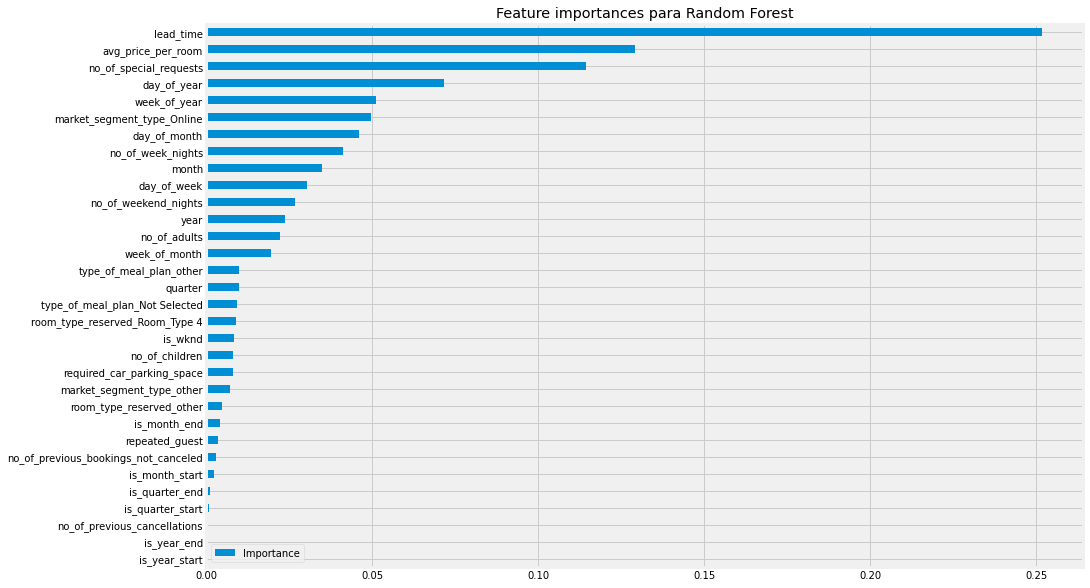

In [42]:
pd.DataFrame(grid_search_rf.best_estimator_.feature_importances_.tolist(), index=X.columns, columns=['Importance']).sort_values('Importance').plot.barh(figsize=(14,10))
plt.title('Feature importances para Random Forest')
plt.show()

## 3) Determinar el mejor modelo de Gradient Boosting y de XGBoost (1 punto)

**Boosting** es un algoritmo de aprendizaje automático que ayuda a mejorar las performances de los modelos. Como bagging, utiliza el sistema de votación para clasificaciones, combinando distintos modelos del mismo tipo. Mientras que en bagging cada modelo es construido por separado, en boosting estos modelos son preparados teniendo en cuenta la performance de sus pares. 

Así como la técnica les aplica una ponderación a los modelos por su buena performance, en el mismo sentido los penaliza por su error de clasificación. El algoritmo Gradient Boosting consiste en repetir la construcción de árboles de clasificación, modificando ligeramente las predicciones iniciales cada vez, intentando ir minimizando los residuos en la dirección de decrecimiento, dada por el negativo del gradiente de la función de error.

A diferencia de los anteriores, este modelo no calcula árboles y después los agrega, sino que, para cada árbol construido, ve que errores comete y lo mejora, otorgando siempre el mejor al final.

### Gradient Boosting

Los parámetros a optimizar son:

- Loss: función de pérdida
- Learning rate: magnitud de cambio en sus estimaciones.
- Min samples split: minimo numero de observaciones para separar un nodo.
- Min samples leaf: minimo numero de observaciones para un nodo terminal.
- max depth
- max features

Notar que hay más parámetros a optimizar y más opciones para interar dentro de estos, pero computacionalmente mas agotadores.

Debido al coste computacional de este tipo de modelos, realizaremos un muestreo aleatorio para estudiarlo. Lo mismo haremos con redes neuronales y SVM.

In [43]:
df_sample = df.sample(n=round(df.shape[0]*0.3), random_state=seed)
df_sample.shape

(10346, 31)

Confirmamos que la distribución general se mantuvo

In [44]:
df_sample.status.value_counts()/df_sample.shape[0]

0   0.68
1   0.32
Name: status, dtype: float64

In [45]:
df.status.value_counts()/df.shape[0]

0   0.68
1   0.32
Name: status, dtype: float64

Creamos los nuevos Train y Test

In [46]:
target= 'status'

X = df_sample[num_cols+cat_cols+date_cols]
y = df_sample[target]

X = pd.get_dummies(X, columns = cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [47]:
X_train.shape, X_test.shape

((8276, 32), (2070, 32))

In [48]:
f'Reservas canceladas en Train: {round(y_train.value_counts()[1]/len(y_train),2)*100}%, reservas canceladas en Test: {round(y_test.value_counts()[1]/len(y_test),2)*100}%'

'Reservas canceladas en Train: 32.0%, reservas canceladas en Test: 31.0%'

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
%%time

params = {
    "loss":["deviance",'exponential'],
    "learning_rate": [0.01, 0.05],
    "min_samples_split": [5,10],
    'max_depth':[10,50],
    'max_features': ['sqrt','log2']
    }

model = GradientBoostingClassifier(random_state=seed)

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_gb = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=1,
                           n_jobs = -1)


grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Wall time: 1min 1s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [10, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 10]},
             scoring='roc_auc', verbose=1)

El mejor modelo de GradientBoosting otorga un AUC de 0.93, con los siguientes parámetros:

In [51]:
print(f'Mejor modelo Gradient Boosting cuenta con parametros: {grid_search_gb.best_estimator_}')
print(f'El AUC es de: {round(grid_search_gb.best_score_,3)}')

Mejor modelo Gradient Boosting cuenta con parametros: GradientBoostingClassifier(learning_rate=0.05, loss='deviance', max_depth=10,
                           max_features='sqrt', min_samples_split=10,
                           random_state=42)
El AUC es de: 0.93


In [52]:
preds = grid_search_gb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1422
           1       0.84      0.77      0.80       648

    accuracy                           0.88      2070
   macro avg       0.87      0.85      0.86      2070
weighted avg       0.88      0.88      0.88      2070



No cambia mucho el orden de las importancias de variables

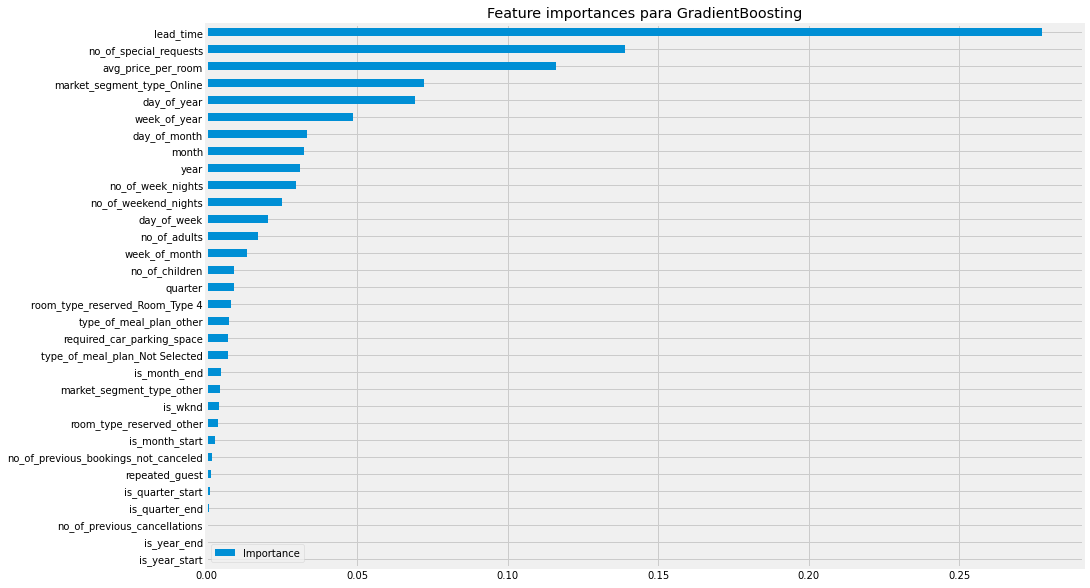

In [53]:
pd.DataFrame(grid_search_gb.best_estimator_.feature_importances_.tolist(), index=X.columns, columns=['Importance']).sort_values('Importance').plot.barh(figsize=(14,10))
plt.title('Feature importances para GradientBoosting')
plt.show()

### XGBoosting

Este modelo es una evolución del anterior, utilizando el concepto de *regularización*. Este concepto sirve para evitar el sobreajuste, pero dentro de la optimización interna del modelo en sí.


Los parámetros a optimizar son:

- max depth
- Learning rate
- n_estimators
- Gamma:nos dice el minimo de la funcion de perdida para hacer un split. Mientras más alto sea, más regularización.
- Subsample: nos dice la fracción de observaciones para usar en cada arbol. Mientras mas bajo, menos overfitting.

Notar que hay más parámetros a optimizar y más opciones para interar dentro de estos, pero computacionalmente mas agotadores.

In [54]:
import xgboost as xgb

In [55]:
%%time

param_grid = {
    'max_depth': [10,50],
    'learning_rate': [0.01,0.05],
    'n_estimators': [10,50,100],
    'colsample_bytree':[0.5, 0.75],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.75]
}

model = xgb.XGBClassifier(random_state=seed)

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_xgb = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=1,
                           n_jobs = -1)


grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[10:27:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "loss", "max_features", "min_samples_split" } are not used.

Wall time: 41.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [10, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 10]},
             scoring='roc_auc', verbose=1)

La optimización de parametros de XGBoosting otorga un AUC de 0.932, apenas superior al GradientBoosting

In [56]:
print(f'Mejor modelo XGBoosting cuenta con parametros: {grid_search_xgb.best_estimator_}')
print(f'El AUC es de: {round(grid_search_xgb.best_score_,3)}')

Mejor modelo XGBoosting cuenta con parametros: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, loss='deviance',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, ...)
El AUC es de: 0.932


In [57]:
preds = grid_search_xgb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1422
           1       0.83      0.76      0.79       648

    accuracy                           0.87      2070
   macro avg       0.86      0.84      0.85      2070
weighted avg       0.87      0.87      0.87      2070



Se puede notar una diferencia en la importancia de variables. Mientras que para los previos modelos el lead_time era la clave para los arboles, ahora lo es el tipo de segmento, en este caso si fue Online o no. Tambien toma importancia si la reserva fue para fin de mes o no.

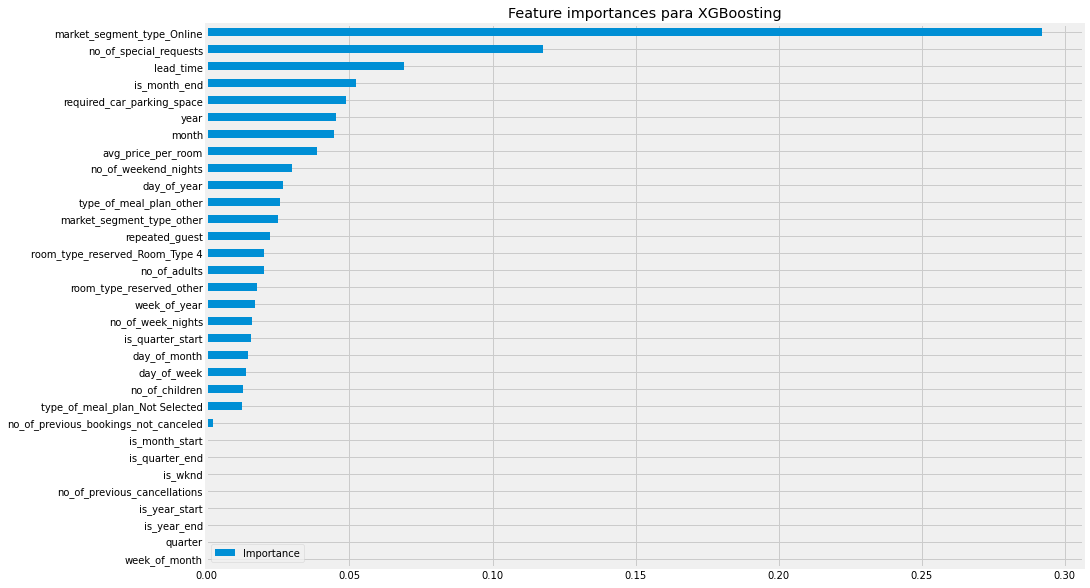

In [58]:
pd.DataFrame(grid_search_xgb.best_estimator_.feature_importances_.tolist(), index=X.columns, columns=['Importance']).sort_values('Importance').plot.barh(figsize=(14,10))
plt.title('Feature importances para XGBoosting')
plt.show()

## Redes Neuronales

### 4) Realizar y detallar el preprocesado de los datos previo a la determinación de la Red Neuronal. (1 punto)

In [92]:
X.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,month,day_of_month,day_of_year,week_of_month,week_of_year,day_of_week,year,is_wknd,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,type_of_meal_plan_Not Selected,type_of_meal_plan_other,room_type_reserved_Room_Type 4,room_type_reserved_other,market_segment_type_Online,market_segment_type_other
count,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00,10346.00
mean,1.85,0.11,0.81,2.20,0.03,78.68,0.02,0.02,0.11,105.02,0.62,7.40,15.60,209.44,2.68,30.27,4.03,2017.81,0.44,2.79,0.03,0.03,0.01,0.01,0.00,0.00,0.15,0.08,0.17,0.06,0.65,0.06
std,0.52,0.41,0.86,1.37,0.17,74.03,0.14,0.35,1.39,32.97,0.78,3.07,8.77,93.76,1.27,13.39,2.05,0.39,0.50,1.03,0.18,0.18,0.10,0.12,0.02,0.05,0.36,0.27,0.38,0.23,0.48,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2017.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,0.00,1.00,0.00,18.00,0.00,0.00,0.00,80.75,0.00,5.00,8.00,134.00,2.00,20.00,2.00,2018.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,1.00,2.00,0.00,56.00,0.00,0.00,0.00,100.00,0.00,8.00,16.00,225.00,3.00,33.00,4.00,2018.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,2.00,0.00,2.00,3.00,0.00,119.00,0.00,0.00,0.00,121.55,1.00,10.00,23.00,285.00,4.00,41.00,6.00,2018.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,4.00,10.00,5.00,15.00,1.00,292.00,1.00,13.00,51.00,332.57,5.00,12.00,31.00,365.00,5.00,52.00,7.00,2018.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 5) Probar los distintos métodos de selección de variables, compararlos y determinar las variables de entrada a la red. (1 punto)

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif

# Creamos un objeto SelectKBest y especificamos la función de puntuación y el número de características que queremos conservar
kbest = SelectKBest(f_classif, k=15)

# Ajustamos el objeto SelectKBest al conjunto de datos
X_new = kbest.fit_transform(X, y)

# Obtenemos los nombres de las características seleccionadas
caracteristicas_seleccionadas = [nombre for i, nombre in enumerate(X.columns) if kbest.get_support()[i]]

# Imprimimos los nombres de las características seleccionadas
print("Características seleccionadas: ", caracteristicas_seleccionadas)

Características seleccionadas:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'year', 'is_quarter_start', 'type_of_meal_plan_other', 'market_segment_type_Online', 'market_segment_type_other']


In [73]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=10)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
embeded_lgb_feature

['no_of_week_nights',
 'lead_time',
 'avg_price_per_room',
 'month',
 'day_of_month',
 'day_of_year',
 'week_of_year']

In [69]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=15)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
embeded_rf_feature

['no_of_week_nights',
 'lead_time',
 'avg_price_per_room',
 'no_of_special_requests',
 'month',
 'day_of_month',
 'day_of_year',
 'week_of_year',
 'day_of_week',
 'market_segment_type_Online']

In [87]:
X2 = X[embeded_lgb_feature]
X_train2, X_test2, y_train, y_test = train_test_split(X2,y,test_size=0.2,random_state=seed)

In [88]:
%%time

params = {
    'n_estimators':[10,20,30],
    'criterion':['gini','entropy'],
    'max_depth':[10,20,50,70,100],
    'max_features': ['auto','sqrt','log2']
}

model = RandomForestClassifier(random_state=seed)

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_rf2 = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=1,
                           n_jobs = -1)


grid_search_rf2.fit(X_train2, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Wall time: 7.28 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 70, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [89]:
print(f'Mejor modelo Random Forest cuenta con parametros: {grid_search_rf2.best_estimator_}')
print(f'El AUC es de: {round(grid_search_rf2.best_score_,3)}')

Mejor modelo Random Forest cuenta con parametros: RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       n_estimators=30, random_state=42)
El AUC es de: 0.842


In [90]:
preds = grid_search_rf2.predict(X_test2)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1422
           1       0.79      0.62      0.70       648

    accuracy                           0.83      2070
   macro avg       0.82      0.77      0.79      2070
weighted avg       0.83      0.83      0.82      2070



Normalizar

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

In [95]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos de entrenamiento
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Evaluar el modelo con los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [96]:
%%time

params = {
    'n_estimators':[10,20,30],
    'criterion':['gini','entropy'],
    'max_depth':[10,20,50,70,100],
    'max_features': ['auto','sqrt','log2']
}

model = RandomForestClassifier(random_state=seed)

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_rf2 = GridSearchCV(estimator = model,  
                           param_grid = params,
                           scoring = 'roc_auc',
                           cv = kfold,
                           verbose=1,
                           n_jobs = -1)


grid_search_rf2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Wall time: 8.48 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 70, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [97]:
print(f'Mejor modelo Random Forest cuenta con parametros: {grid_search_rf2.best_estimator_}')
print(f'El AUC es de: {round(grid_search_rf2.best_score_,3)}')

Mejor modelo Random Forest cuenta con parametros: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       n_estimators=30, random_state=42)
El AUC es de: 0.92


### 6) Con el mejor o (mejores modelos), estudiar los mejores parámetros (nodos, decay) en Redes Neuronales (tuneando con caret o similar). (1 punto)

In [107]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [108]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el modelo de red neuronal como una función
def create_model(input_dim, units1, units2, dropout_rate, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units1, input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Definir los hiperparámetros a buscar y sus rangos
param_dist = {
    'input_dim': [20],
    'units1': randint(1, 100),
    'units2': randint(1, 100),
    'dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100],
    'optimizer': ['adam', 'rmsprop']
}

# Convertir el modelo de Keras en un estimador de Scikit-Learn
model = KerasClassifier(build_fn=create_model, verbose=0)
kfold = KFold(n_splits=5,shuffle=True,random_state=seed)


# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=kfold,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)
random_search.fit(X, y)

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("Mejor score encontrado:")
print(random_search.best_score_)

ModuleNotFoundError: No module named 'tensorflow'

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Created wheel for jax: filename=jax-0.4.7-py3-none-any.whl size=1438262 sha256=512f139290b1ff315758ba88c8491ef680ed7ad1c34f77bfeaeaa4cb5301f59b
  Stored in directory: c:\users\denis\appdata\local\pip\cache\wheels\cd\de\72\6c0e59e93fcc7702ab33cc2a49fa726b5684222c8ed7171183
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: scipy
    Found

  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\denis\anaconda3\python.exe' 'c:\Users\denis\anaconda3\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\denis\AppData\Local\Temp\pip-build-env-clhto1bw\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel
       cwd: None
  Complete output (42 lines):
  Traceback (most recent call last):
    File "c:\Users\denis\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\denis\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\denis\anaconda3\lib\site-packages\pip\__main__.py", line 24, in <module>
      sys.exit(_main())
    File "c:\Users\denis\anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 71, in main
      command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
    File "c:\Use

In [103]:
preds_net = random_search_nets.predict(X_test)
roc_auc_score(y_test,preds_net)

0.7495018752930145

## 7) Realizar una búsqueda paramétrica para determinar el mejor modelo de SVM con al menos dos kernels diferentes. (1 punto)

### Support Vector Machines

Este es un modelo que utiliza metodos de entrenamiento supervisado para problemas de regresión o clasificación. Su funcionamiento se basa en el concepto de hiperplanos. 

El modelo SVM busca encontrar un hiperplano óptimo que separe las muestras de diferentes clases en el espacio de características. El hiperplano óptimo es aquel que maximiza la distancia entre los vectores de soporte más cercanos de las diferentes clases. Estos son efectivos en casos de alta dimensionalidad.

Sus principales conceptos son el de **maximal margin**, el encontrar un vector de parametros que maximice el margen de separacion de las clases, **soft margin**, una especie de permiso de fallar y **kernel**, la transformación a aplicar a los datos no lineales.

Sus parametros importantes son:

- C: aumentar este parametro implica reducir el sesgo y tener más sobreajuste.
- Kernel: funciones matemáticas que permiten mapear las muestras a un espacio de características no lineal sin la necesidad de transformar explícitamente los datos. Los kernels más comunes son el kernel lineal, el kernel polinómico y el kernel radial.

El modelo clasificará el nuevo dato según su ubicación en relación al hiperplano encontrado durante el entrenamiento.

Debido al alto costo computacional, hacemos una sample aun mas pequeña que para los anteriores, tomando el 10% de los datos

In [109]:
df_sample = df.sample(n=round(df.shape[0]*0.1), random_state=seed)
df_sample.shape

(3449, 31)

Confirmamos que la distribución general se mantuvo

In [110]:
df_sample.status.value_counts()/df_sample.shape[0]

0   0.69
1   0.31
Name: status, dtype: float64

In [111]:
df.status.value_counts()/df.shape[0]

0   0.68
1   0.32
Name: status, dtype: float64

In [112]:
target= 'status'

X = df_sample[num_cols+cat_cols+date_cols]
y = df_sample[target]

X = pd.get_dummies(X, columns = cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [113]:
X_train.shape, X_test.shape

((2759, 32), (690, 32))

In [114]:
f'Reservas canceladas en Train: {round(y_train.value_counts()[1]/len(y_train),2)*100}%, reservas canceladas en Test: {round(y_test.value_counts()[1]/len(y_test),2)*100}%'

'Reservas canceladas en Train: 31.0%, reservas canceladas en Test: 32.0%'

In [115]:
%%time

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.01, 0.001],
              'kernel': ['rbf','poly']} 
  
model = SVC()    

grid_search_svc = GridSearchCV(model, param_grid, refit = True, verbose = 1, n_jobs=-1)
  
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print(f'Mejor modelo XGBoosting cuenta con parametros: {grid_search_svc.best_estimator_}')
print(f'El AUC es de: {round(grid_search_svc.best_score_,3)}')

In [ ]:
preds = grid_search_svc.predict(X_test)
print(classification_report(y_test,preds))

## 8) Realizar un método de ensamblado de Bagging con un mismo clasificador base que no sea un árbol. (1 punto)

Podemos utilizar a nuestro modelo de regresión logistica previamente optimizado:

In [28]:
df_sample = df.sample(n=round(df.shape[0]*0.2), random_state=seed)
df_sample.shape

(6898, 31)

In [29]:
target= 'status'

X = df_sample[num_cols+cat_cols+date_cols]
y = df_sample[target]

X = pd.get_dummies(X, columns = cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [32]:
%%time

params = {'max_features': [0.5, 0.7, 1.0],
              'max_samples': [0.5, 0.7, 1.0],
              'n_estimators': [2, 5, 10, 20],
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_bg_2 = GridSearchCV(BaggingClassifier(LogisticRegression(C=0.1, random_state=seed, solver='newton-cg')),
                     params, 
                     cv=kfold,
                     verbose=1, 
                     scoring = 'roc_auc',
                     n_jobs = -1)

grid_search_bg_2.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 54.3 s


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=BaggingClassifier(estimator=LogisticRegression(C=0.1,
                                                                      random_state=42,
                                                                      solver='newton-cg')),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [33]:
print(f'Mejor modelo bagging cuenta con parametros: {grid_search_bg_2.best_estimator_}')
print(f'Otros parámetros: {grid_search_bg_2.best_params_}')
print(f'El AUC es de: {round(grid_search_bg_2.best_score_,3)}')

Mejor modelo bagging cuenta con parametros: BaggingClassifier(estimator=LogisticRegression(C=0.1, random_state=42,
                                               solver='newton-cg'),
                  n_estimators=5)
Otros parámetros: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 5}
El AUC es de: 0.851


In [34]:
preds = grid_search_bg_2.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       949
           1       0.71      0.58      0.63       431

    accuracy                           0.79      1380
   macro avg       0.76      0.73      0.74      1380
weighted avg       0.79      0.79      0.79      1380



## 9) Realizar un método de Stacking escogiendo varios algoritmos de entrada y el modelo que se prefiera como modelo de ensamblaje. (1 punto)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Definir los modelos de nivel inferior
estimators = [('dt', DecisionTreeClassifier(random_state=seed)),
              ('logreg', LogisticRegression()),
              ('rf',RandomForestClassifier(random_state=seed))]

# Definir el modelo de nivel superior
reg = RandomForestClassifier()

# Definir el modelo de Stacking
reg_stack = StackingClassifier(estimators=estimators, final_estimator=reg)

# Entrenar el modelo de Stacking
reg_stack.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = reg_stack.predict(X_test)

# Calcular el R-cuadrado
r2 = roc_auc_score(y_test, y_pred)

print('AUC:', r2)

AUC: 0.8019871937489457


In [40]:
recall_score(y_test, y_pred)

0.7146171693735499

## 10) Comparar todos los modelos anteriores y determinar el mejor de todos ellos (1 punto)

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
tf.keras.utils.set_random_seed(0) 

In [ ]:
layers.